# Capítulo 2 

In [12]:
import pandas as pd    
import numpy as np
import statsmodels.formula.api as smf

## Ejemplo 2.3 Salario del director general y rendimiento de las acciones (ceosal1.dta)

In [10]:
dfej2_3 = pd.read_stata('ceosal1.dta')
dfej2_3.head()

,salary,pcsalary,sales,roe,pcroe,ros,indus,finance,consprod,utility,lsalary,lsales
0,1095,20,27595.000000,14.1,106.400002,191,1,0,0,0,6.998509,10.225389
1,1001,32,9958.000000,10.9,-30.600000,13,1,0,0,0,6.908755,9.206132
2,1122,9,6125.899902,23.5,-16.299999,14,1,0,0,0,7.022868,8.720281
3,578,-9,16246.000000,5.9,-25.700001,-21,1,0,0,0,6.359574,9.695602
4,1368,7,21783.199219,13.8,-3.000000,56,1,0,0,0,7.221105,9.988894


In [3]:
df1[['salary','roe']].describe()

,salary,roe
count,209.000000,209.000000
mean,1281.119617,17.184210
std,1372.345308,8.518509
min,223.000000,0.500000
25%,736.000000,12.400000
50%,1039.000000,15.500000
75%,1407.000000,20.000000
max,14822.000000,56.299999


In [14]:
regdfej2_3 = smf.ols('salary ~ roe', data = dfej2_3).fit()
print(regdfej2_3.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.767
Date:                Sat, 11 Jul 2020   Prob (F-statistic):             0.0978
Time:                        11:47:17   Log-Likelihood:                -1804.5
No. Observations:                 209   AIC:                             3613.
Df Residuals:                     207   BIC:                             3620.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    963.1913    213.240      4.517      0.0

In [7]:
dir(reg)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'k_constant',
 'llf',
 'load',
 'model',


In [39]:
reg.params

Intercept    963.191336
roe           18.501186
dtype: float64

In [38]:
reg.params.roe

18.50118634521494

In [40]:
reg.params.Intercept

963.1913364725582

In [11]:
reg.aic , reg.bic

(3613.0867060994974, 3619.771374603427, Intercept    213.240257
 roe           11.123251
 dtype: float64)

In [12]:
# Error estándar de los coeficientes
reg.bse

Intercept    213.240257
roe           11.123251
dtype: float64

In [13]:
# suma de cuadrados centrada
reg.centered_tss

391732982.00956935

In [17]:
reg.cov_HC0

array([[14526.36806907,  -562.08178671],
       [ -562.08178671,    46.19503661]])

In [19]:
reg.df_resid

207.0

In [20]:
reg.eigenvals

array([7.69786303e+04, 4.09794929e+01])

In [21]:
reg.ess

5166419.039866626

In [23]:
reg.pvalues

Intercept    0.000011
roe          0.097768
dtype: float64

In [41]:
reg.params/reg.bse

Intercept    4.516930
roe          1.663289
dtype: float64

In [26]:
reg.tvalues

Intercept    4.516930
roe          1.663289
dtype: float64

In [28]:
reg.f_pvalue

0.09776774891928805

In [42]:
reg.ess/(reg.ess+reg.ssr)

0.013188624081033901

In [43]:
reg.rsquared

0.01318862408103394

In [44]:
# S**2 estimación de la . REvisar por que le falta el menos uno como en la fórmula matricial abajo
reg.ssr/(reg.nobs-2)

1867471.318694216

In [46]:
import numpy as np
np.var(df1.roe)

72.21779

In [47]:
df1.salary.cov(df1.roe)

1342.538397960971

In [48]:
df1.roe.cov(df1.roe)

72.56498977473412

In [49]:
df1.salary.cov(df1.roe)/df1.roe.cov(df1.roe)

18.50118634521492

In [51]:
df1.cov()


,salary,pcsalary,sales,roe,pcroe,ros,indus,finance,consprod,utility,lsalary,lsales
salary,1.883332e+06,388.384339,1.749198e+06,1342.538398,3830.506742,-3151.361037,-45.668338,14.108162,127.297226,-95.737049,617.306903,269.866846
pcsalary,3.883843e+02,1064.972810,5.902668e+03,24.278515,659.791671,306.541222,0.067722,-1.230700,0.769530,0.393449,0.810346,-2.156540
sales,1.749198e+06,5902.668085,1.130665e+08,-5016.816344,5782.899362,-98656.050446,465.648318,-238.789868,333.563947,-560.422397,1694.018012,8003.649550
roe,1.342538e+03,24.278515,-5.016816e+03,72.564990,3.470921,159.663717,0.053644,-0.631604,1.578112,-1.000152,1.005938,-1.057709
pcroe,3.830507e+03,659.791671,5.782899e+03,3.470921,9451.611614,854.628470,-1.346308,3.703260,-0.691484,-1.665467,5.929907,2.293869
ros,-3.151361e+03,306.541222,-9.865605e+04,159.663717,854.628470,4648.110370,-6.682002,-3.057577,10.753704,-1.014124,-2.879214,-24.198776
indus,-4.566834e+01,0.067722,4.656483e+02,0.053644,-1.346308,-6.682002,0.218854,-0.070896,-0.092473,-0.055484,-0.004278,0.028570
finance,1.410816e+01,-1.230700,-2.387899e+02,-0.631604,3.703260,-3.057577,-0.070896,0.172479,-0.063489,-0.038093,0.023720,0.016421
consprod,1.272972e+02,0.769530,3.335639e+02,1.578112,-0.691484,10.753704,-0.092473,-0.063489,0.205650,-0.049687,0.056578,-0.008762
utility,-9.573705e+01,0.393449,-5.604224e+02,-1.000152,-1.665467,-1.014124,-0.055484,-0.038093,-0.049687,0.143265,-0.076020,-0.036229


In [52]:
(reg.nobs-1)*np.var(df1.roe)

15021.300048828125

In [53]:
np.sqrt((reg.ssr/(reg.nobs-2))/((reg.nobs)*np.var(df1.roe)))

11.123250916412918

In [54]:
reg.bse.roe

11.123250903287639

In [55]:
reg.ess/(reg.ssr/(reg.nobs-2))

2.7665319344658634

In [56]:
reg.fvalue

2.7665319344658634

In [64]:
reg.resid.head()

0   -129.058071
1   -163.854261
2   -275.969216
3   -494.348338
4    149.492288
dtype: float64

In [62]:
sum(reg.resid**2)

386566562.9697028

In [63]:
reg.ssr

386566562.9697027

In [65]:
reg.fittedvalues.head()

0    1224.058071
1    1164.854261
2    1397.969216
3    1072.348338
4    1218.507712
dtype: float64

In [66]:
np.mean(reg.fittedvalues)

1281.119617224881

In [67]:
np.mean(df1.salary)

1281.1196172248804

In [68]:
np.int(sum(reg.resid))

0

In [69]:
reg.t_test([1,0])

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0           963.1913    213.240      4.517      0.000     542.790    1383.592

In [70]:
reg.f_test([0, 1])

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[2.76653193]]), p=0.09776774891928652, df_denom=207, df_num=1>

In [74]:
R = [[0, 1], [1, 0]]
print(np.array(R))
print(reg.f_test(R))

[[0 1]
 [1 0]]
<F test: F=array([[93.22534637]]), p=1.3545131497032778e-29, df_denom=207, df_num=2>


In [76]:
reg.model.exog[:10]

array([[ 1.        , 14.10000038],
       [ 1.        , 10.89999962],
       [ 1.        , 23.5       ],
       [ 1.        ,  5.9000001 ],
       [ 1.        , 13.80000019],
       [ 1.        , 20.        ],
       [ 1.        , 16.39999962],
       [ 1.        , 16.29999924],
       [ 1.        , 10.5       ],
       [ 1.        , 26.29999924]])

In [77]:
print(reg.model.data.orig_exog.head(10))

   Intercept        roe
0        1.0  14.100000
1        1.0  10.900000
2        1.0  23.500000
3        1.0   5.900000
4        1.0  13.800000
5        1.0  20.000000
6        1.0  16.400000
7        1.0  16.299999
8        1.0  10.500000
9        1.0  26.299999


In [78]:
reg.predict(pd.DataFrame({'roe' : [12]}))

0    1185.205573
dtype: float64

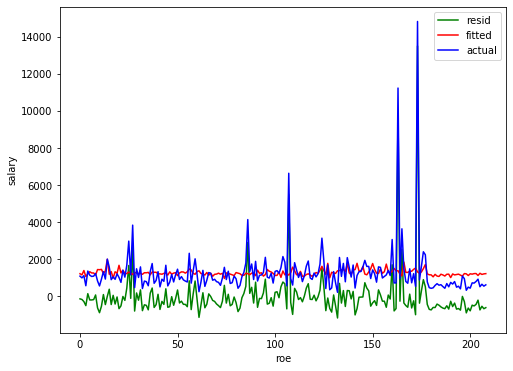

In [79]:
# Gráfica como serie de Actual Fitted Residual
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(reg.resid,'g', label="resid")
ax.plot(reg.fittedvalues,'r', label="fitted" )
ax.plot(df1.salary,'b', label="actual")
ax.legend(loc='best')
ax.set_xlabel('roe')
ax.set_ylabel('salary');

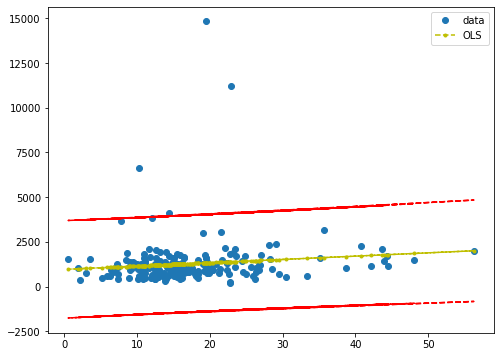

In [37]:
# Gráfica como Scatter de los datos y la recta de regresión e intervalos
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
prstd, iv_l, iv_u = wls_prediction_std(reg)

fig, ax = plt.subplots(figsize=(8,6))
x = df1.roe
y = df1.salary
ax.plot(x, y, 'o', label="data")
ax.plot(x, reg.fittedvalues, 'y--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best');

In [107]:
df2 = df1[['salary','roe']]

In [108]:
type(reg.fittedvalues)

pandas.core.series.Series

In [109]:
# igual con reg.fittedvalues.to_frame() 
a = pd.DataFrame({'salaryhat':reg.fittedvalues})
a

,salaryhat
0,1224.058071
1,1164.854261
2,1397.969216
3,1072.348338
4,1218.507712
...,...
204,1129.702014
205,1249.959725
206,1187.055698
207,1216.657586


In [ ]:
# df2['salaryhat']= reg.fittedvalues, lo hará pero da un aviso de error

In [110]:
df2 = pd.concat([df2, a], axis=1)

In [111]:
df2.head()

,salary,roe,salaryhat
0,1095,14.1,1224.058071
1,1001,10.9,1164.854261
2,1122,23.5,1397.969216
3,578,5.9,1072.348338
4,1368,13.8,1218.507712


In [112]:
b = pd.DataFrame({'residOLS':reg.resid})

In [113]:
df2 = pd.concat([df2, b], axis=1)

In [114]:
df2.head()

,salary,roe,salaryhat,residOLS
0,1095,14.1,1224.058071,-129.058071
1,1001,10.9,1164.854261,-163.854261
2,1122,23.5,1397.969216,-275.969216
3,578,5.9,1072.348338,-494.348338
4,1368,13.8,1218.507712,149.492288


In [ ]:
# HAcer fórmulas 

In [ ]:
# Formulas matriciales

In [ ]:
# b = (X´X)^-1 * X´y

In [115]:
x = df2['roe']
y = df2['salary']
m = len(x)  

In [116]:
X = np.column_stack( (np.ones((m,1)) , x ) )     # Construct the augmented matrix X
b = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

In [131]:
len(X)

209

In [117]:
b

array([963.19133647,  18.50118635])

In [132]:
len(b)

2

In [127]:
b.shape

(2,)

In [126]:
y.shape

(209,)

In [128]:
z = np.dot(X,b)
z.shape

(209,)

In [149]:
# le saque el -1 de /(n-k-1)
G2 = np.dot((y-np.dot(X,b)).T, (y-np.dot(X,b)))/(len(X)-len(b))
G2

1867471.3186942164

In [138]:
# Propiedad X'e = 0

np.dot(X.T,(y-np.dot(X,b)))

array([1.42563295e-10, 1.42972567e-09])

In [139]:
np.sum(y-np.dot(X,b))

1.418811734765768e-10

In [ ]:
# Matriz de varianas y covarianzas
# G2 (X'X)^-1

In [150]:
MVC = np.dot(G2, np.linalg.inv(np.dot(X.T, X)))
MVC

array([[45471.40716492, -2126.14584106],
       [-2126.14584106,   123.72671066]])

In [148]:
reg.cov_params()

,Intercept,roe
Intercept,45471.407165,-2126.145841
roe,-2126.145841,123.726711


In [ ]:
#ANOVA

sm.stats.anova_lm(reg)

In [ ]:
Hacer fórmulas matriciales , gráfica en 3D

In [ ]:
comprobación de supuestos fórmulas demostraciones
propiedades


**Pruebas de Hipótesis en el Modelo de Regresión Clásico**  

#### La Distribución Normal y las Distribuciones de Muestreo  

Es frecuente asumir que los elementos del vector de perturbaciones $ \epsilon $ dentro de las ecuaciones de regresión $ y = X\beta + \epsilon $ están distribuidos de forma independiente e idéntica según una ley normal. Bajo esta suposición, se pueden derivar las distribuciones de muestreo de las estimaciones y probar diversas hipótesis sobre los parámetros subyacentes.  

Para denotar que $ x $ es una variable aleatoria con distribución normal, media $ E(x) = \mu $ y matriz de dispersión $ D(x) = \Sigma $, escribimos $ x \sim N(\mu, \Sigma) $. Un vector $ z \sim N(0, I) $ con media cero y matriz de dispersión $ D(z) = I $ se describe como un vector normal estándar. Cualquier vector normal $ x \sim N(\mu, \Sigma) $ se puede estandarizar de la siguiente manera:  

1. Si $ T $ es una transformación tal que $ T\Sigma T^{\top} = I $ y $ T^{\top} T = \Sigma^{-1} $, entonces:
   $
   T(x - \mu) \sim N(0, I).
   $

Asociadas con la distribución normal hay varias distribuciones de muestreo, que ocurren frecuentemente en problemas de inferencia estadística. Entre ellas están la distribución ji-cuadrado, la distribución $ F $ y la distribución $ t $.  

Si $ z \sim N(0, I) $ es un vector normal estándar de $ n $ elementos, entonces la suma de los cuadrados de sus elementos tiene una distribución chi-cuadrado con $ n $ grados de libertad; esto se denota como $ z^{\top} z \sim \chi^2(n) $. Con la ayuda de la transformación de estandarización, se puede demostrar que:

2. Si $ x \sim N(\mu, \Sigma) $ es un vector de orden $ n $, entonces:
   $
   (x - \mu)^{\top} \Sigma^{-1} (x - \mu) \sim \chi^2(n).
   $

La suma de dos variables chi-cuadrado independientes es también una variable ji-cuadrado cuya cantidad de grados de libertad es la suma de los grados de libertad de sus componentes. Así,  

3. Si $ u \sim \chi^2(m) $ y $ v \sim \chi^2(n) $ son variables ji-cuadrado independientes con $ m $ y $ n $ grados de libertad, respectivamente, entonces $ (u + v) \sim \chi^2(m + n) $ es una variable ji-cuadrado con $ m + n $ grados de libertad.

La razón de dos variables chi-cuadrado independientes divididas por sus respectivos grados de libertad tiene una distribución $ F $, caracterizada completamente por esos grados de libertad. Así,  

4. Si $ u \sim \chi^2(m) $ y $ v \sim \chi^2(n) $ son variables ji-cuadrado independientes, entonces la variable $ F = \frac{(u/m)}{(v/n)} $ tiene una distribución $ F $ con $ m $ y $ n $ grados de libertad, lo cual se denota escribiendo $ F \sim F(m, n) $.

La distribución de muestreo que se usa con más frecuencia es la distribución $ t $. Una variable $ t $ es la razón de una variable normal estándar y la raíz de una variable ji-cuadrado independiente dividida por sus grados de libertad. Así,  

5. Si $ z \sim N(0, 1) $ y $ v \sim \chi^2(n) $ son variables independientes, entonces
   $
   t = \frac{z}{\sqrt{(v/n)}}
   $
   tiene una distribución $ t $ con $ n $ grados de libertad; esto se denota escribiendo $ t \sim t(n) $.

Es claro que $ t^2 \sim F(1, n) $.  

### Hipótesis sobre los Coeficientes  

Una función lineal de un vector con distribución normal es también normalmente distribuida. La estimación de mínimos cuadrados ordinarios $ \hat{\beta} = (X^{\top}X)^{-1}X^{\top}y $ del vector de parámetros $ \beta $ en el modelo de regresión $ (y; X\beta, \sigma^2 I) $ es una función lineal de $ y $, que tiene un valor esperado $ E(\hat{\beta}) = \beta $ y una matriz de dispersión de $ D(\hat{\beta}) = \sigma^2 (X^{\top}X)^{-1} $. Así, se deduce que si $ y \sim N(X\beta, \sigma^2 I) $ es normalmente distribuido, entonces  

6. $
   \hat{\beta} \sim N_k\left(\beta, \sigma^2 (X^{\top}X)^{-1}\right).
   $

Del mismo modo, las distribuciones marginales de $ \hat{\beta}_1 $ y $ \hat{\beta}_2 $ dentro de $ \hat{\beta}^{\top} = \left[\hat{\beta}_1^{\top}, \hat{\beta}_2^{\top}\right] $ se dan por:  

7. $
   \hat{\beta}_1 \sim N_{k_1}\left(\beta_1, \sigma^2 \{X_1^{\top}(I - P_2)X_1\}^{-1}\right),
   $

8. $
   \hat{\beta}_2 \sim N_{k_2}\left(\beta_2, \sigma^2 \{X_2^{\top}(I - P_1)X_2\}^{-1}\right).
   $

A partir de los resultados en (2) a (6), se deduce que:  

9. $
   \sigma^{-2}(\hat{\beta} - \beta)^{\top} X^{\top}X (\hat{\beta} - \beta) \sim \chi^2(k).
   $

Similarmente, se deduce de (7) y (8) que:  

10. $
   \sigma^{-2}(\hat{\beta}_1 - \beta_1)^{\top} X_1^{\top}(I - P_2)X_1 (\hat{\beta}_1 - \beta_1) \sim \chi^2(k_1),
   $

11. $
   \sigma^{-2}(\hat{\beta}_2 - \beta_2)^{\top} X_2^{\top}(I - P_1)X_2 (\hat{\beta}_2 - \beta_2) \sim \chi^2(k_2).
   $

La distribución del vector de residuos $ e = y - X\hat{\beta} $ es degenerada en el sentido de que la transformación $ e = (I - P)\epsilon $ del vector de perturbaciones $ \epsilon $ al residual

FALTA

## Ejemplo 2.4  Salario y educación (wage1.dta)

In [4]:
dfej2_4= pd.read_stata('wage1.dta')
dfej2_4.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4


In [6]:
regdfej2_4 = smf.ols('wage ~ educ', data = dfej2_4).fit()
print(regdfej2_4.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     103.4
Date:                Sat, 11 Jul 2020   Prob (F-statistic):           2.78e-22
Time:                        11:38:35   Log-Likelihood:                -1385.7
No. Observations:                 526   AIC:                             2775.
Df Residuals:                     524   BIC:                             2784.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9049      0.685     -1.321      0.1

## Ejemplo 2.5 Resultados electorales y gastos de campaña (vote1.dta)

In [7]:
dfej2_5= pd.read_stata('vote1.dta')
dfej2_5.head()

,state,district,democA,voteA,expendA,expendB,prtystrA,lexpendA,lexpendB,shareA
0,AL,7,1,68,328.295990,8.737000,41,5.793916,2.167567,97.407669
1,AK,1,0,62,626.377014,402.476990,60,6.439952,5.997638,60.881039
2,AZ,2,1,73,99.607002,3.065000,55,4.601233,1.120048,97.014763
3,AZ,3,0,69,319.690002,26.281000,64,5.767352,3.268846,92.403702
4,AR,3,0,75,159.220993,60.054001,66,5.070293,4.095244,72.612473


In [9]:
regdfej2_5 = smf.ols('voteA ~ shareA', data = dfej2_5).fit()
print(regdfej2_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  voteA   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     1018.
Date:                Sat, 11 Jul 2020   Prob (F-statistic):           6.63e-74
Time:                        11:40:01   Log-Likelihood:                -565.20
No. Observations:                 173   AIC:                             1134.
Df Residuals:                     171   BIC:                             1141.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.8122      0.887     30.221      0.0

## Ejemplo 2.6 Salario de director general y rendimiento de las acciones* (ceosal1.dta)

In [ ]:
dfej2_3

## Ejemplo 2.7 Salario y educación* (wage1.dta)

## Ejemplo 2.8 Salario de director general y rendimiento de las acciones* (ceosal1.dta)

## Ejemplo 2.9 Resultados electorales y gastos de campaña*(vote1.dta)

## Ejemplo 2.10 Una ecuación logarítmica del salario*(wage1.dta)

In [13]:
regdfej2_10 = smf.ols('np.log(wage) ~ educ', data = dfej2_4).fit()
print(regdfej2_10.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(wage)   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     119.6
Date:                Sat, 11 Jul 2020   Prob (F-statistic):           3.27e-25
Time:                        11:45:51   Log-Likelihood:                -359.38
No. Observations:                 526   AIC:                             722.8
Df Residuals:                     524   BIC:                             731.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5838      0.097      5.998      0.0

## Ejemplo 2.11 Salario de director general y ventas de la compañía*(ceosal1.dta)

In [15]:

regdfej2_11 = smf.ols('np.log(salary) ~ np.log(sales)', data = dfej2_3).fit()
print(regdfej2_11.summary())

                            OLS Regression Results                            
Dep. Variable:         np.log(salary)   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     55.30
Date:                Sat, 11 Jul 2020   Prob (F-statistic):           2.70e-12
Time:                        11:48:14   Log-Likelihood:                -152.50
No. Observations:                 209   AIC:                             309.0
Df Residuals:                     207   BIC:                             315.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.8220      0.288     16.723

## Ejemplo 2.12 Rendimiento de los alumnos en matemátlcas y ptograma de almuerzos en los colegios (meap93.dta)

In [17]:
dfej2_12= pd.read_stata('meap93.dta')
dfej2_12.head()

,lnchprg,enroll,staff,expend,salary,benefits,droprate,gradrate,math10,sci11,totcomp,ltotcomp,lexpend,lenroll,lstaff,bensal,lsalary
0,1.4,1862,112.599998,5765,37498.0,7420,2.9,89.199997,56.400002,67.900002,44918.0,10.712594,8.659560,7.529407,4.723842,0.197877,10.532043
1,2.3,11355,101.199997,6601,48722.0,10370,1.3,91.400002,42.700001,65.300003,59092.0,10.986851,8.794976,9.337414,4.617099,0.212840,10.793886
2,2.7,7685,114.000000,6834,44541.0,7313,3.5,91.400002,43.799999,54.299999,51854.0,10.856188,8.829665,8.947025,4.736198,0.164186,10.704165
3,3.4,1148,85.400002,3586,31566.0,5989,3.6,86.599998,25.299999,60.000000,37555.0,10.533562,8.184793,7.045776,4.447346,0.189729,10.359836
4,3.4,1572,96.099998,3847,29781.0,5545,0.0,100.000000,15.300000,65.800003,35326.0,10.472375,8.255049,7.360104,4.565389,0.186193,10.301626


In [18]:
regdfej2_12 = smf.ols('math10 ~ lnchprg', data = dfej2_12).fit()
print(regdfej2_12.summary())

                            OLS Regression Results                            
Dep. Variable:                 math10   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     83.77
Date:                Sat, 11 Jul 2020   Prob (F-statistic):           2.75e-18
Time:                        11:50:35   Log-Likelihood:                -1499.3
No. Observations:                 408   AIC:                             3003.
Df Residuals:                     406   BIC:                             3011.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.1427      0.998     32.221      0.0

In [ ]:
# Supuestos

In [ ]:
# TEst de los supuestos

In [ ]:
#  TEst t, F, Wald, Hausman ( o cualquiera de endogeneidad), Hetero , Autocorr, TEst normalidad, Gauss Markov

In [ ]:
# Demostraciones

In [ ]:
# Presentacón